# **Data loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow


 **Copy images to folders**

In [ ]:
import shutil

In [ ]:
src_tst = '/content/drive/MyDrive/Colab Notebooks/Research project/models/Malaria data/test/'
src_trn = '/content/drive/MyDrive/Colab Notebooks/Research project/models/Malaria data/train/'
src_val = '/content/drive/MyDrive/Colab Notebooks/Research project/models/Malaria data/validation/'

dst_tst = '/content/drive/MyDrive/Colab Notebooks/Research project/Data augmentation/data/test2'
dst_trn = '/content/drive/MyDrive/Colab Notebooks/Research project/Data augmentation/data/train2'
dst_val = '/content/drive/MyDrive/Colab Notebooks/Research project/Data augmentation/data/validation2'
dst_tst2 = '/content/drive/MyDrive/Colab Notebooks/Research project/Data augmentation/data/test2_aug'

In [ ]:
# Copy images (RUN ONCE!)

shutil.copytree(src_tst, dst_tst)
shutil.copytree(src_trn, dst_trn)
shutil.copytree(src_val, dst_val)

In [ ]:
# Copy images to 2nd test folder (RUN ONCE)

shutil.copytree(src_tst, dst_tst2)

'/content/drive/MyDrive/Colab Notebooks/Research project/Data augmentation/data/test2_aug'

In [ ]:
# helper funtion to count images

def count_image_files(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tif', '.tiff']
    total_images = 0

    for root, _, files in os.walk(folder_path):
        for file in files:
            _, ext = os.path.splitext(file)
            if ext.lower() in image_extensions:
                total_images += 1

    return total_images

In [ ]:
count_image_files('/content/drive/MyDrive/Colab Notebooks/Research project/Data augmentation/data')

3462

# **Data preprocessing**

In [ ]:
import keras.utils as image
import matplotlib.pyplot as plt

In [ ]:
# Geometric transformations datagenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   brightness_range=[0.3,0.9],
                                   fill_mode='nearest')


In [ ]:
# Rescale test images

test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen2 = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   brightness_range=[0.3,0.9],
                                   fill_mode='nearest')

# **Display augmented images**

In [ ]:
# Path to the image

image_path = '/content/drive/MyDrive/Colab Notebooks/Research project/Data augmentation/data/train2/infected/20170607_143659.jpg'

In [ ]:
# Load the image

img = image.load_img(image_path, target_size = (150,150))
img_array = image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)

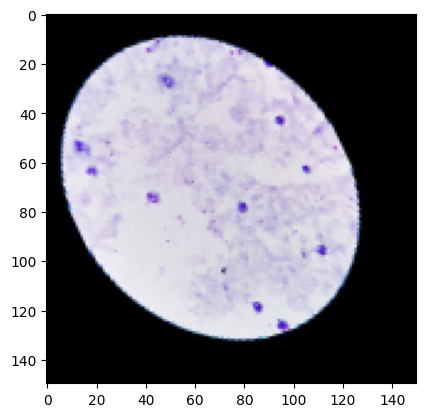

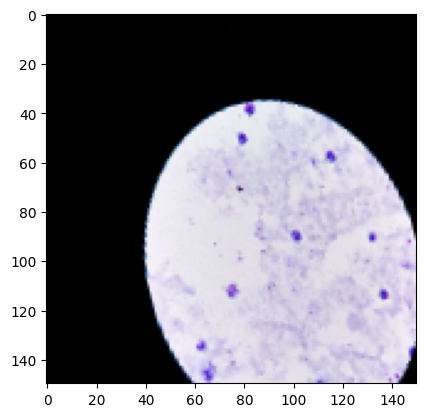

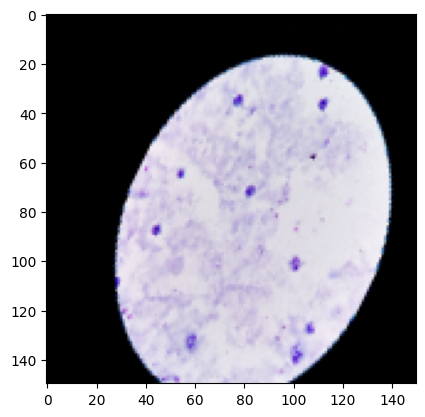

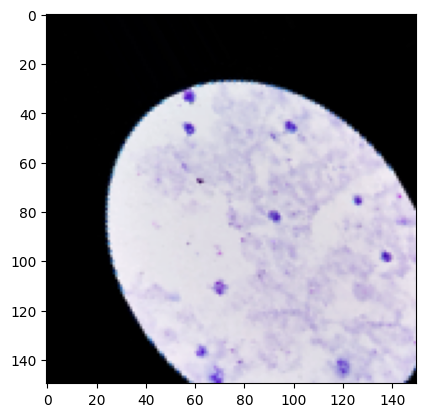

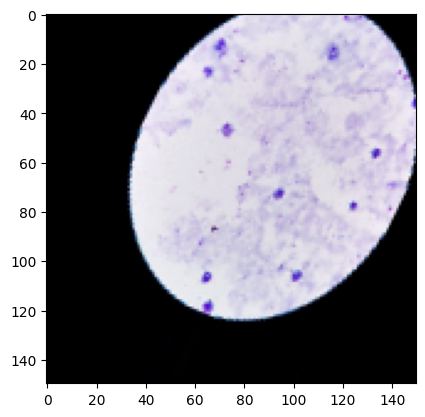

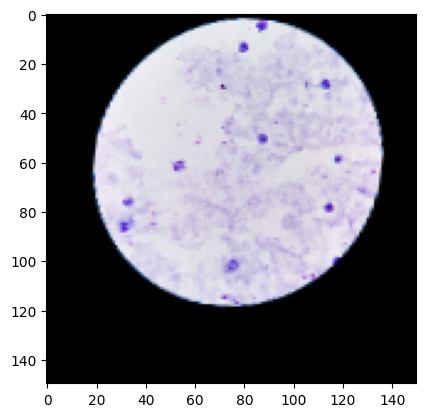

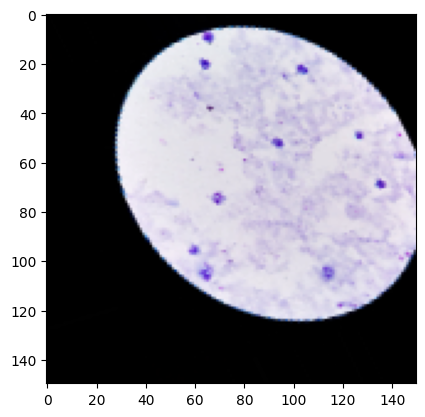

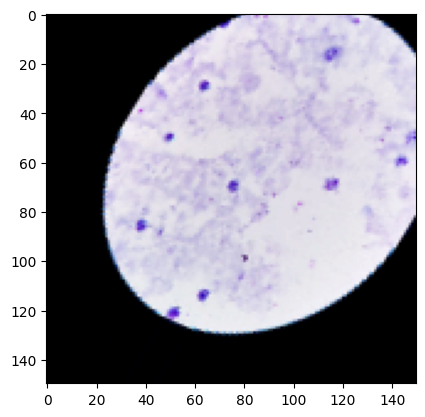

In [ ]:
i=0
for batch in train_datagen.flow(img_array, batch_size=1):
  img.save(f"/content/drive/MyDrive/Colab Notebooks/Research project/Data augmentation/augmented_images/img_{i}.jpg")
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 8 == 0:
    break

plt.show()

# **Model Development and Training**

In [ ]:
from keras import layers
from keras import models
import pickle

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [ ]:
# generators

train_generator = train_datagen.flow_from_directory(dst_trn,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(dst_val,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

test_generator = test_datagen.flow_from_directory(dst_tst,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')




Found 2105 images belonging to 2 classes.
Found 451 images belonging to 2 classes.
Found 453 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


In [ ]:
test_generator2 = test_datagen2.flow_from_directory(dst_tst2,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

Found 453 images belonging to 2 classes.


In [ ]:
# Fit the model

history = model.fit(train_generator,
                    steps_per_epoch=2105//20,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=451//20)

Epoch 1/50
105/105 [==============================] - 1741s 17s/step - loss: 0.6725 - acc: 0.6240 - val_loss: 0.6629 - val_acc: 0.6250
Epoch 2/50
105/105 [==============================] - 227s 2s/step - loss: 0.6676 - acc: 0.6187 - val_loss: 0.6855 - val_acc: 0.6227
Epoch 3/50
105/105 [==============================] - 239s 2s/step - loss: 0.6672 - acc: 0.6197 - val_loss: 0.6625 - val_acc: 0.6227
Epoch 4/50
105/105 [==============================] - 229s 2s/step - loss: 0.6659 - acc: 0.6201 - val_loss: 0.6592 - val_acc: 0.6295
Epoch 5/50
105/105 [==============================] - 232s 2s/step - loss: 0.6651 - acc: 0.6221 - val_loss: 0.6667 - val_acc: 0.6182
Epoch 6/50
105/105 [==============================] - 237s 2s/step - loss: 0.6656 - acc: 0.6216 - val_loss: 0.6620 - val_acc: 0.6250
Epoch 7/50
105/105 [==============================] - 234s 2s/step - loss: 0.6657 - acc: 0.6192 - val_loss: 0.6641 - val_acc: 0.6205
Epoch 8/50
105/105 [==============================] - 231s 2s/step 

In [ ]:
# Save the model and training history

save_dir = '/content/drive/MyDrive/Colab Notebooks/Research project/Data augmentation'

model.save(save_dir + 'intensityop2_epoch_50.h5')
with open('intensityop2_epoch_50.pkl', 'wb') as f:
    pickle.dump(history.history, f)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Results**

In [ ]:
os.listdir(save_dir)

['geometric_transformations2.ipynb',
 'data',
 'augmented_img.png',
 'geometric_transformations.ipynb']

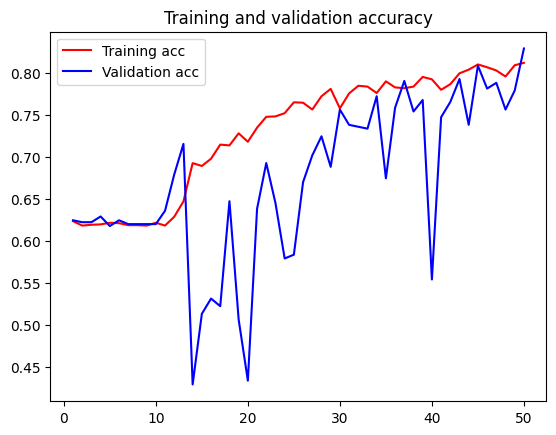

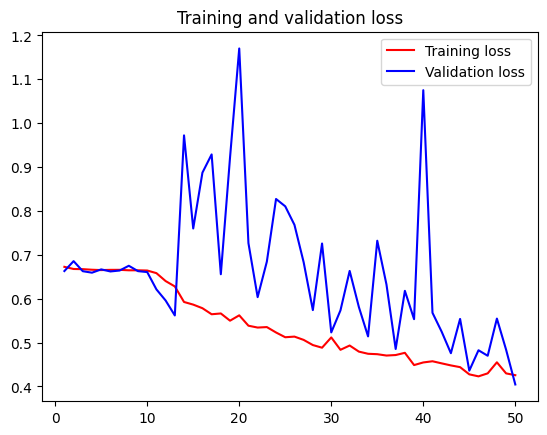

In [ ]:
# Loss and accuracy curves during training

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(save_dir + 'accuracy_training_inteop.png', dpi=300, bbox_inches='tight')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(save_dir + 'loss_training_inteop.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Test results

test_loss, test_acc = model.evaluate(test_generator, steps=453//20)
print('test acc:', test_acc)

22/22 [==============================] - 420s 20s/step - loss: 0.3608 - acc: 0.8432
test acc: 0.8431817889213562


In [ ]:
# Test results with augmented unseen data

test_loss2, test_acc2 = model.evaluate(test_generator2, steps=453//20)
print('test2 acc:', test_acc2)

22/22 [==============================] - 386s 18s/step - loss: 0.3656 - acc: 0.8432
test2 acc: 0.8431817889213562
